Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50)

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


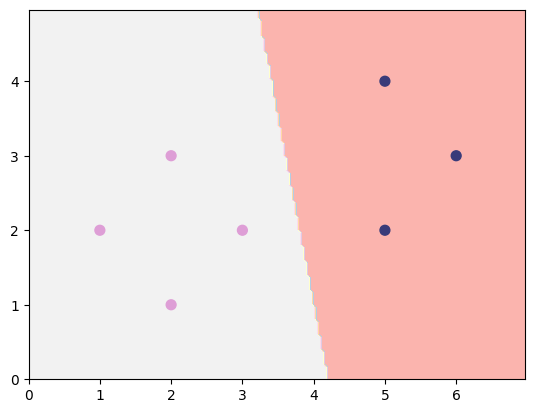

In [5]:
# Vaš kôd ovdje
h = RidgeClassifier(alpha=0).fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, h.predict)

y_pred = h.predict(seven_X)
print(accuracy_score(y_pred, seven_y))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

[-0.25 -0.05]
1.55


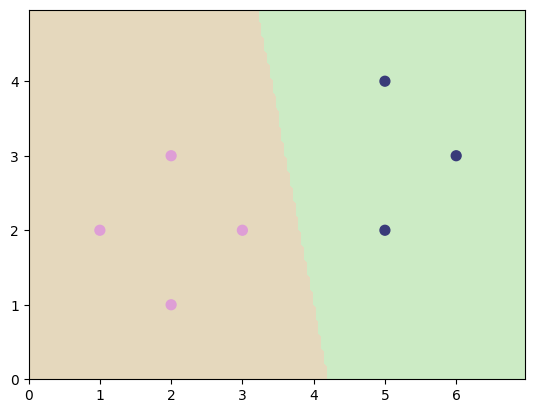

In [6]:
# Vaš kôd ovdje
h_linear_regression = LinearRegression(fit_intercept=True).fit(seven_X, seven_y)

print(h_linear_regression.coef_)
print(h_linear_regression.intercept_)

func = lambda x : h_linear_regression.predict(x) >= 0.5

plot_2d_clf_problem(seven_X, seven_y, func)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


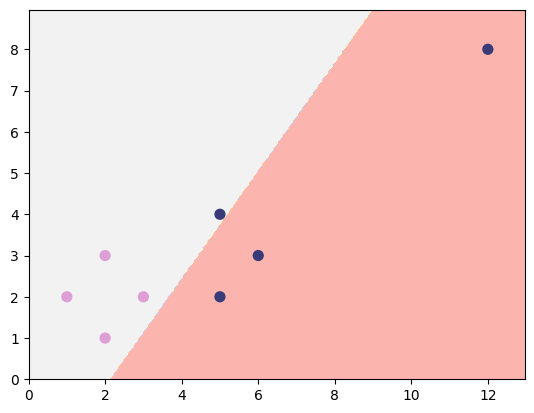

In [8]:
# Vaš kôd ovdje
h_outlier = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, h_outlier.predict)

y_pred_outlier = h_outlier.predict(outlier_X)
print(accuracy_score(y_pred_outlier, outlier_y))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


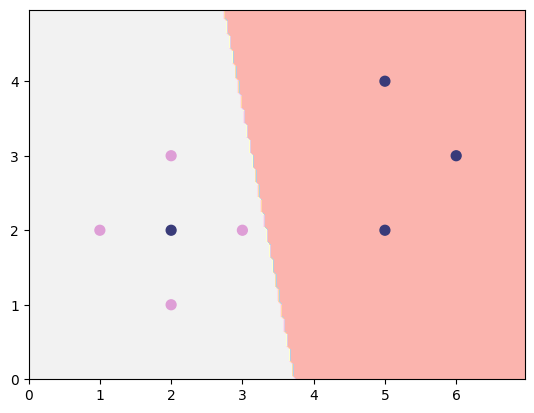

In [10]:
# Vaš kôd ovdje
h_unsep = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)

plot_2d_clf_problem(unsep_X, unsep_y, h_unsep.predict)

y_pred_unsep = h_unsep.predict(unsep_X)
print(accuracy_score(y_pred_unsep, unsep_y))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

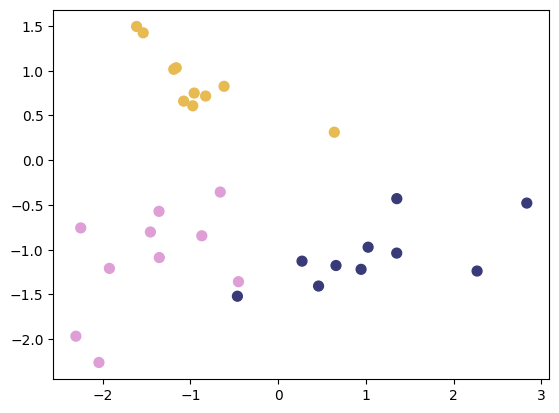

In [15]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
x_dataset, y_dataset = make_classification(30, 2, n_redundant=0, n_classes=3, n_clusters_per_class=1)

plot_2d_clf_problem(x_dataset, y_dataset)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

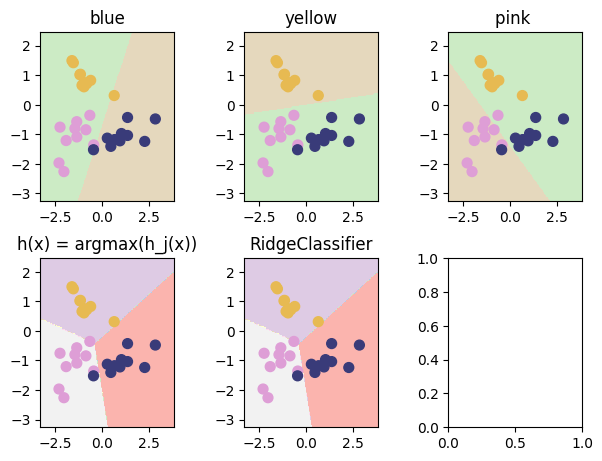

In [16]:
# Vaš kôd ovdje
from numpy import argmax

h_ovr = RidgeClassifier(alpha=0).fit(x_dataset, y_dataset)

y1 = []
y2 = []
y3 = []

for y in y_dataset:
    if y == 0:
        y1.append(1)
    else:
        y1.append(-1)
    if y == 1:
        y2.append(1)
    else:
        y2.append(-1)
    if y == 2:
        y3.append(1)
    else:
        y3.append(-1)

h1 = LinearRegression(fit_intercept=True).fit(x_dataset, y1)
h2 = LinearRegression(fit_intercept=True).fit(x_dataset, y2)
h3 = LinearRegression(fit_intercept=True).fit(x_dataset, y3)

func_1 = lambda x : h1.predict(x) >= 0
func_2 = lambda x : h2.predict(x) >= 0
func_3 = lambda x : h3.predict(x) >= 0

predict = lambda x : argmax([h1.predict(x.reshape(1, -1)), h2.predict(x.reshape(1, -1)), h3.predict(x.reshape(1, -1))])

fig, _ = plt.subplots(2, 3)
fig.tight_layout(pad=2.0)
plt.subplot(2, 3, 1)
plt.title(f"blue")
plot_2d_clf_problem(x_dataset, y_dataset, func_1)
plt.subplot(2, 3, 2)
plt.title(f"yellow")
plot_2d_clf_problem(x_dataset, y_dataset, func_2)
plt.subplot(2, 3, 3)
plt.title(f"pink ")
plot_2d_clf_problem(x_dataset, y_dataset, func_3)
plt.subplot(2, 3, 4)
plt.title(f"h(x) = argmax(h_j(x))")
plot_2d_clf_problem(x_dataset, y_dataset, predict)
plt.subplot(2, 3, 5)
plt.title(f"RidgeClassifier")
plot_2d_clf_problem(x_dataset, y_dataset, h_ovr.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

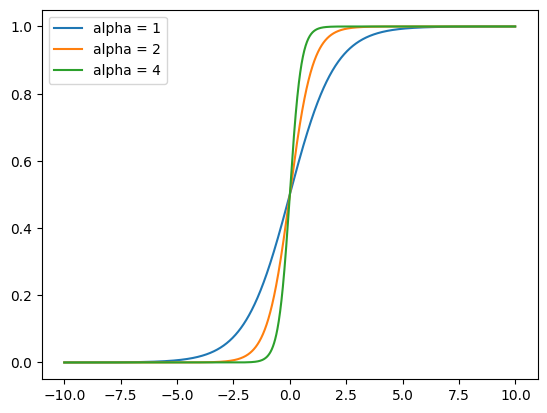

In [17]:
# Vaš kôd ovdje
from numpy import exp

alpha = 1
def sigm(x):
    return 1/(1+exp(-x))

func = lambda x : sigm(x)

x = np.arange(-10, 10, 0.01)

for alpha in (1, 2, 4):
    plt.plot(x, func(x*alpha), label="alpha = " + str(alpha))
    plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [58]:
from numpy import linalg
from numpy.lib.scimath import log
from sklearn.metrics import log_loss

def lr_h(x, w):
    PHI = PolynomialFeatures(1).fit_transform(x.reshape(1,-1))  
    return sigm(PHI.dot(w))

def loss(h, y):
    return (- y * log(h + 1e-10) - (1 - y) * (log(1 - h + 1e-10)))


def cross_entropy_error(X, y, w):
    PHI = PolynomialFeatures(1).fit_transform(X)
    #return loss(sigm(PHI.dot(w)), y)
    return log_loss(y, sigm(PHI.dot(w)))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Vaš kôd ovdje
    N = len(X)
    diff = 10
    w_generations = []
    # w <- w - eta*SUM(grad(L))
    n = len(X[0])
    w = np.zeros(np.shape(X)[1] + 1)
    counter = 0
    err_init = epsilon**-1


    while diff >= epsilon and counter <= max_iter:
        err = 0
        w_temp = np.zeros(np.shape(X)[1])
        w_temp0 = 0
        for i in range(0, N):
            h = lr_h(X[i], w)
            w_temp0 += h - y[i]
            w_temp += (h - y[i]) * X[i]
            err  += loss(h, y[i])
        w[0] -= eta * w_temp0[0]
        w[1:] = w[1:] * (1-eta*alpha) - eta * w_temp
        w_generations.append(w.copy())
        counter += 1
        
        diff = abs(err_init - err)
        err_init = err

    print("Halting cause: ")
    if counter >= max_iter:
        print("max_iter")
    else:
        print("epsilon")

    if trace:
        return w_generations
    return w





### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [20]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Halting cause: 
epsilon
[ 7.73524231 -2.38495911  0.46227967]
Unakrsna pogreška entropije: 0.054589521141930435


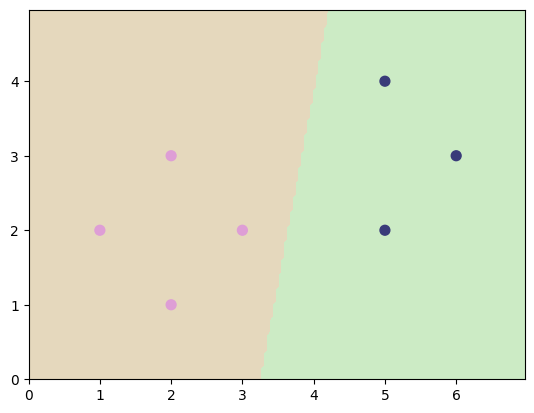

In [59]:
# Vaš kôd ovdje
w = lr_train(seven_X, seven_y, max_iter=10000)
print(w)

print("Unakrsna pogreška entropije: " + str(cross_entropy_error(seven_X, seven_y, w)))

func = lambda x : lr_h(x, w) > 0.5

plot_2d_clf_problem(seven_X, seven_y, func)


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [52]:
from sklearn.metrics import zero_one_loss

Halting cause: 
max_iter
0.07748694977994652
Halting cause: 
max_iter
Halting cause: 
max_iter
Halting cause: 
epsilon
Halting cause: 
epsilon


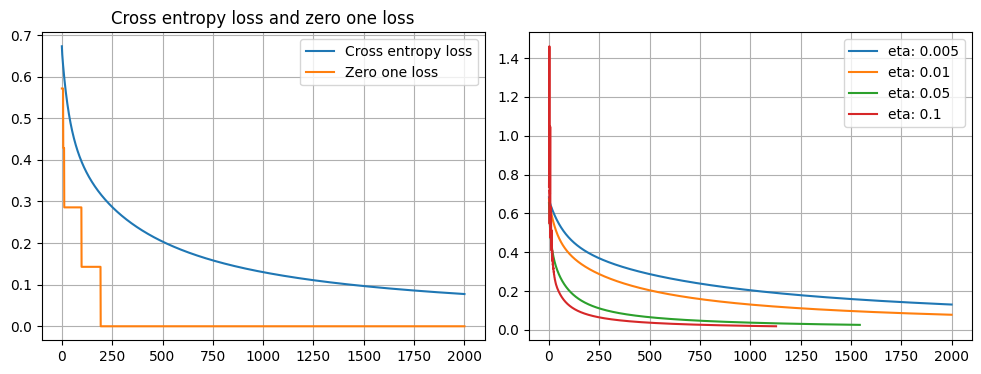

In [83]:
# Vaš kôd ovdje
w_generations = lr_train(seven_X, seven_y, trace=True)

eta_list = [0.005, 0.01, 0.05, 0.1]
err_cross_2 = []
err_cross_2_main = []

err_sigm = []
err_zo = []
positions = list(range(len(w_generations)))

PHI = PolynomialFeatures(1).fit_transform(seven_X)

h_3e = lambda x: x >= 0.5

for i in range(0,len(w_generations)):
    #h = lr_h(seven_X[i], w)
    err_sigm.append(cross_entropy_error(seven_X, seven_y, w_generations[i]))
    err_zo.append(zero_one_loss(seven_y, h_3e(sigm(PHI.dot(w_generations[i])))))

positions = np.array(positions)
err_sigm = np.array(err_sigm)
err_sigm = err_sigm.flatten()
err_zo = np.array(err_zo)
err_zo = err_zo.flatten()

print(err_sigm[len(err_sigm) - 1])

for eta in eta_list:
    err_cross_2 = []
    w_generations = lr_train(seven_X, seven_y, eta = eta, trace = True)
    for i in range(0,len(w_generations)):
        err_cross_2.append(cross_entropy_error(seven_X, seven_y, w_generations[i]))
    err_cross_2_main.append(err_cross_2)

plt.figure(figsize(12, 4))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(err_sigm)
plt.plot(err_zo)
plt.title('Cross entropy loss and zero one loss')
plt.legend(['Cross entropy loss', 'Zero one loss'], loc = 'best')

plt.subplot(1, 2, 2)
plt.grid()
for i in range(0, len(eta_list)):
    plt.plot(err_cross_2_main[i], label = "eta: " + str(eta_list[i]))
    plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

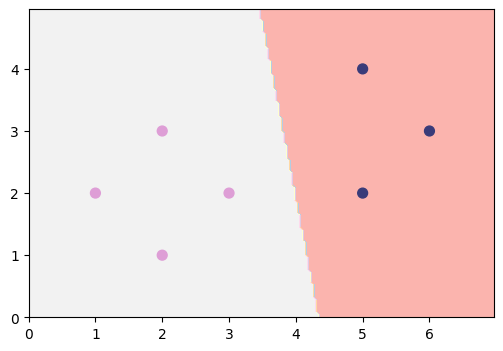

In [96]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
h = LogisticRegression(max_iter=2000, tol=0.0001, C=100).fit(seven_X, seven_y)

func = lambda x : h.predict(x)

plt.figure(figsize(6, 4))

plot_2d_clf_problem(seven_X, seven_y, func)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [97]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Text(0.5, 1.0, 'Linear regression')

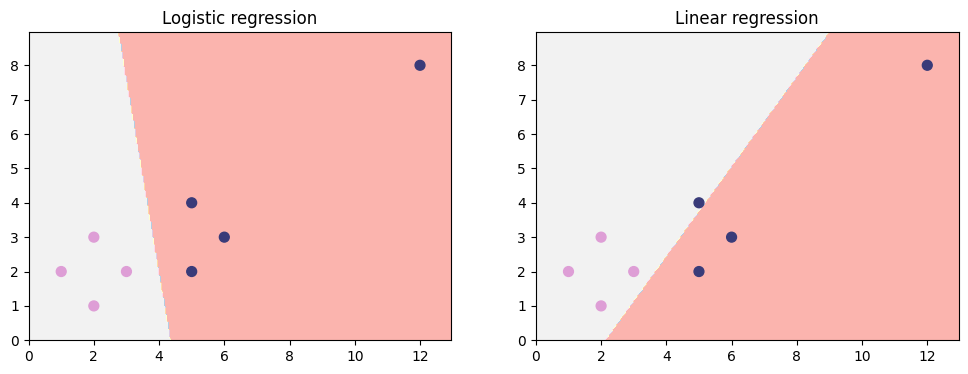

In [107]:
# Vaš kôd ovdje
h_outlier_lr = LogisticRegression(max_iter=2000, tol=0.0001, C=100).fit(outlier_X, outlier_y)

func = lambda x : h_outlier_lr.predict(x)

plt.figure(figsize(12, 4))

plt.subplot(1, 2, 1)
plot_2d_clf_problem(outlier_X, outlier_y, func)
plt.title("Logistic regression")
plt.subplot(1, 2, 2)
plot_2d_clf_problem(outlier_X, outlier_y, h_outlier.predict)
plt.title("Linear regression")

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Halting cause: 
max_iter


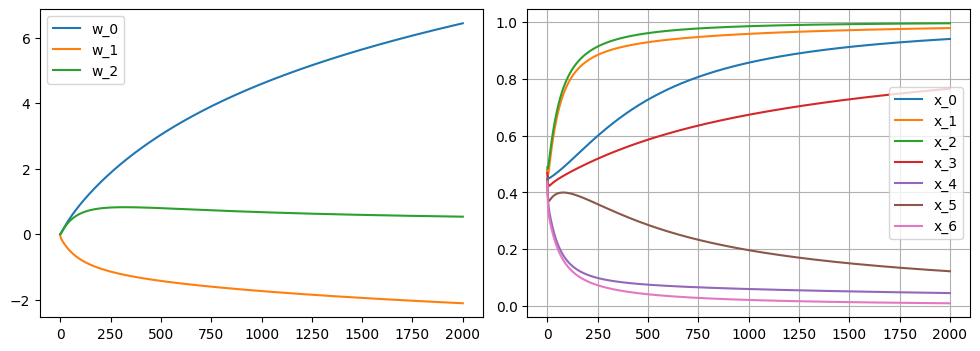

In [118]:
# Vaš kôd ovdje
w_generations = lr_train(seven_X, seven_y, trace=True)
w_0 = []
w_1 = []
w_2 = []

x_0 = []
x_1 = []
x_2 = []
x_3 = []
x_4 = []
x_5 = []
x_6 = []

X = [x_0, x_1, x_2, x_3, x_4, x_5, x_6]

for w in w_generations:
    w_0.append(w[0])
    w_1.append(w[1])
    w_2.append(w[2])

    for x in X:
        x.append(lr_h(seven_X[X.index(x)], w))






plt.figure(figsize(12, 4))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
plt.plot(w_0)
plt.plot(w_1)
plt.plot(w_2)
plt.legend(["w_0", "w_1", "w_2"], loc = 'best')

plt.subplot(1, 2, 2)
for x in X:
    plt.plot(x)
plt.legend(["x_0", "x_1", "x_2", "x_3", "x_4", "x_5", "x_6", "x_7"], loc = 'best')
plt.grid()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [ ]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Halting cause: 
epsilon


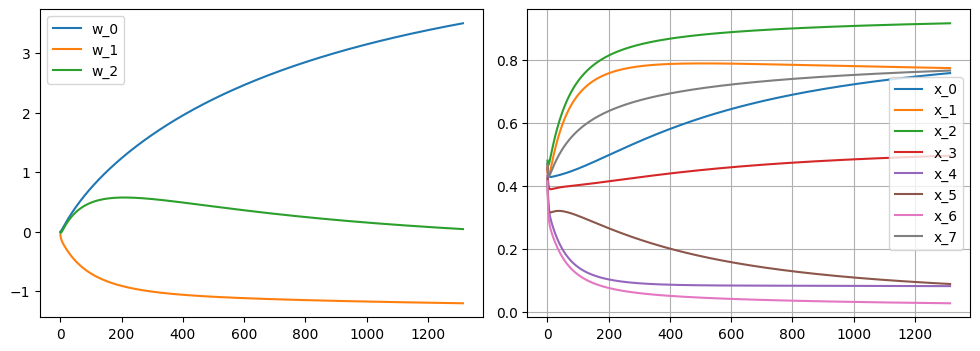

In [115]:
# Vaš kôd ovdje
w_generations = lr_train(unsep_X, unsep_y, trace=True)
w_0 = []
w_1 = []
w_2 = []

x_0 = []
x_1 = []
x_2 = []
x_3 = []
x_4 = []
x_5 = []
x_6 = []
x_7 = []

X = [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7]

for w in w_generations:
    w_0.append(w[0])
    w_1.append(w[1])
    w_2.append(w[2])

    for x in X:
        x.append(lr_h(unsep_X[X.index(x)], w))






plt.figure(figsize(12, 4))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
plt.plot(w_0)
plt.plot(w_1)
plt.plot(w_2)
plt.legend(["w_0", "w_1", "w_2"], loc = 'best')

plt.subplot(1, 2, 2)
for x in X:
    plt.plot(x)
plt.legend(["x_0", "x_1", "x_2", "x_3", "x_4", "x_5", "x_6", "x_7"], loc = 'best')
plt.grid()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [117]:
from numpy.linalg import norm

Halting cause: 
max_iter
Halting cause: 
max_iter
Halting cause: 
epsilon
Halting cause: 
epsilon


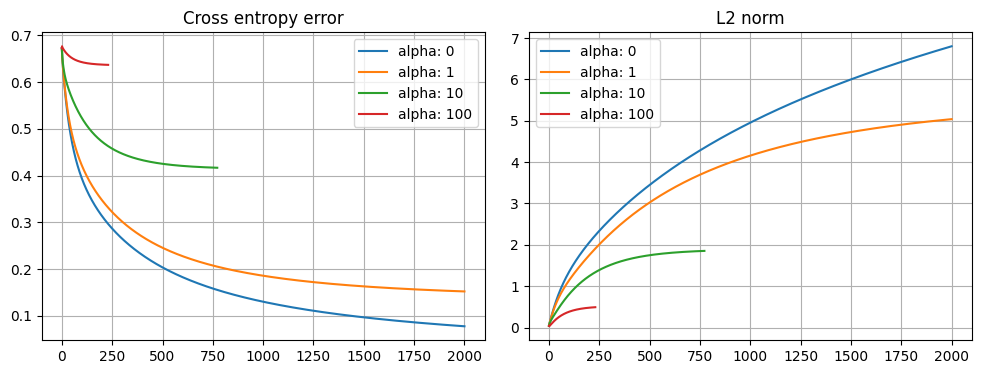

In [138]:
# Vaš kôd ovdje
alpha = [0, 1, 10, 100]


def cross_entropy_error(X, y, w):
    PHI = PolynomialFeatures(1).fit_transform(X)
    #return loss(sigm(PHI.dot(w)), y)
    return log_loss(y, sigm(PHI.dot(w)))

cross_entropy_err_main = []
cross_entropy_err_list = []
l2_norm_main = []
l2_norm_list = []

w_generations_main = []

for a in alpha:
    w_generations_main.append(lr_train(seven_X, seven_y, alpha=a, trace=True))

for i in range(0,len(w_generations_main)):
    cross_entropy_err_list = []
    l2_norm_list = []
    for w in w_generations_main[i]:
        err = cross_entropy_error(seven_X, seven_y, w)
        cross_entropy_err_list.append(err)
        l2_norm_list.append(norm(w))
    cross_entropy_err_main.append(cross_entropy_err_list)
    l2_norm_main.append(l2_norm_list)

plt.figure(figsize(12, 4))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
plt.grid()
for err in cross_entropy_err_main:
    plt.plot(err, label = "alpha: " + str(alpha[cross_entropy_err_main.index(err)]))

plt.title('Cross entropy error')
plt.legend(loc = 'best')

plt.subplot(1, 2, 2)
plt.grid()
for w in l2_norm_main:
    plt.plot(w, label = "alpha: " + str(alpha[l2_norm_main.index(w)]))

plt.title('L2 norm')
plt.legend(loc = 'best')


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [142]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

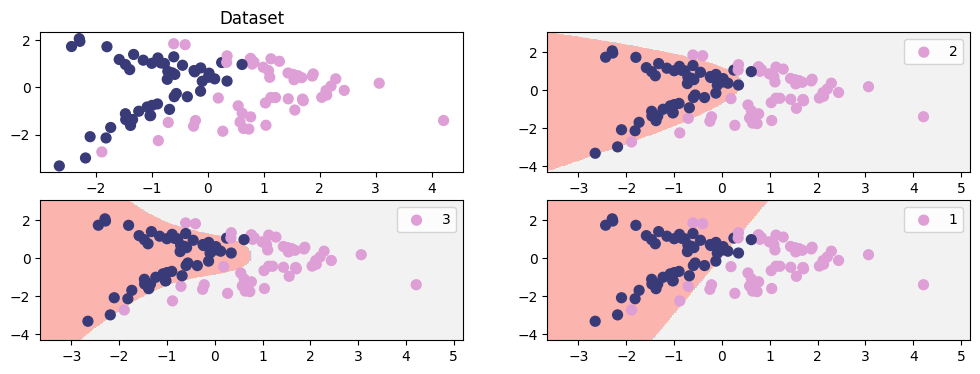

In [202]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
x_dataset, y_dataset = make_classification(100, 2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

plt.subplot(2, 2, 1)
plot_2d_clf_problem(x_dataset, y_dataset)
plt.title('Dataset')

d = [2, 3, 1]
j = 2

for i in d:
    poly = PolynomialFeatures(i)
    PHI = poly.fit_transform(x_dataset)
    model = LogisticRegression()
    h = model.fit(PHI, y_dataset)

    func = lambda x : model.predict(poly.transform(x))

    plt.subplot(2, 2, j)
    plot_2d_clf_problem(x_dataset, y_dataset, func)
    plt.legend(str(i))
    j += 1



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?